<a href="https://colab.research.google.com/github/miguelcorsol/Fastai-Course/blob/master/Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag

platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/{accelerator}/torch_nightly.html
!pip install fastai


Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 576.2MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x62b14000 @  0x7f6400ee72a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 174kB 8.0MB/s 
    100% |████████████████████████████████| 112kB 28.4MB/s 
    100% |████████████████████████████████| 61kB 21.6MB/s 
    100% |████████████████████████████████| 591.8MB 26kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61910000 @  0x7feceded92a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 

In [0]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

1.0.0
True
True


In [0]:
import fastai
print(fastai.__version__)

from fastai import *
from fastai.vision import *


1.0.41


In [0]:
path = untar_data(URLs.DOGS)
path

PosixPath('/root/.fastai/data/dogscats')

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [0]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [0]:
fnames = get_image_files(path_img)
fnames[:15]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_124.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_31.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_49.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_154.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_99.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_41.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_210.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_68.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_131.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_165.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_195.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_89.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_195.jpg'),
 Posix

In [0]:
print(fnames)

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_124.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_31.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_49.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_154.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_99.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_41.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_210.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_68.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_131.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_165.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_195.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_89.jpg'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_195.jpg'), PosixPath('/root/.

In [0]:
np.random.seed(2)
pat = re.compile(r'/([^/]+)_\d+.jpg$')

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

In [1]:
data.show_batch(rows=3, figsize=(7,6))

NameError: ignored

In [0]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 27334339.83it/s]


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.410502,0.356476,0.109608
2,0.549758,0.267160,0.092693
3,0.338625,0.241799,0.082544
4,0.245250,0.227806,0.081867


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

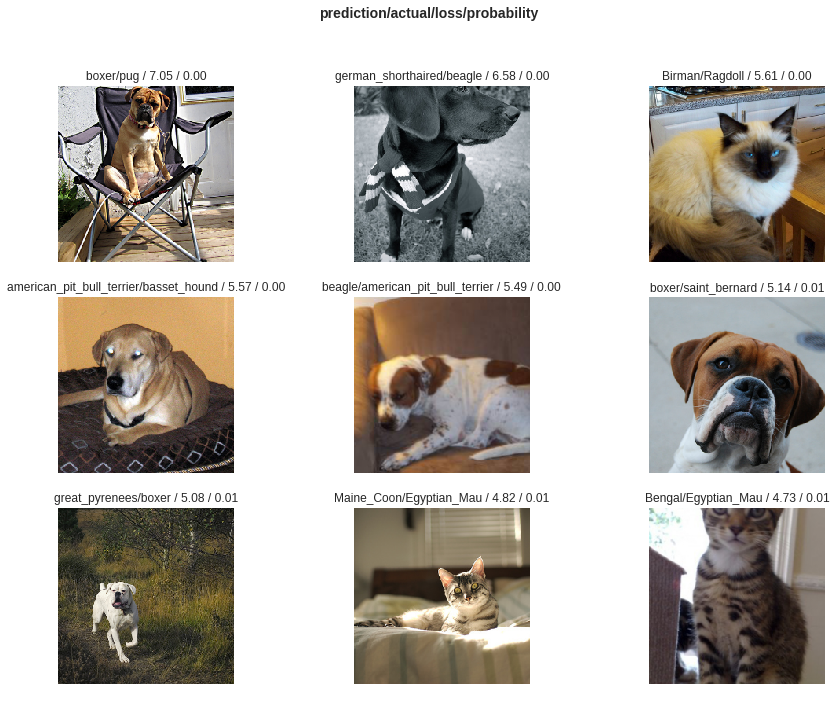

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
doc(interp.plot_top_losses)

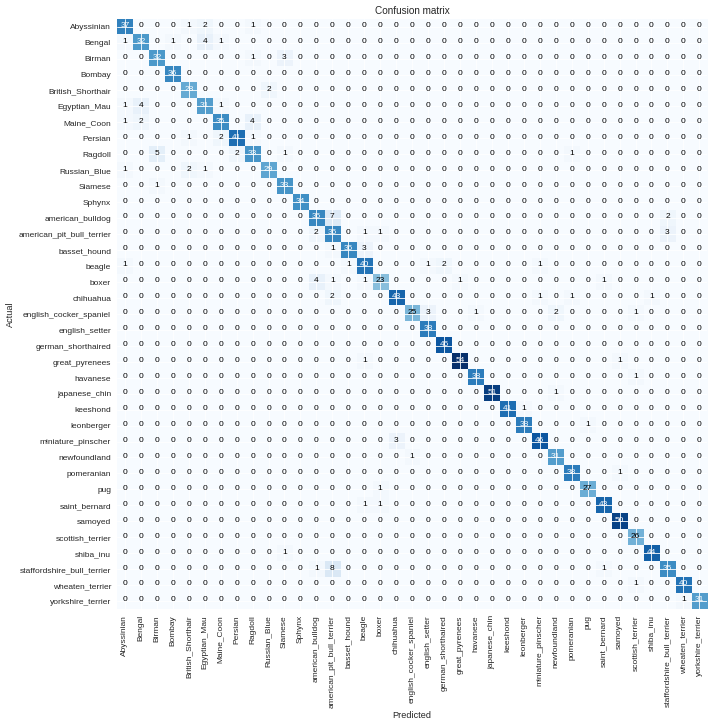

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 8),
 ('american_bulldog', 'american_pit_bull_terrier', 7),
 ('Ragdoll', 'Birman', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Maine_Coon', 'Ragdoll', 4),
 ('boxer', 'american_bulldog', 4),
 ('Birman', 'Siamese', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('basset_hound', 'beagle', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('miniature_pinscher', 'chihuahua', 3)]

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.533424,0.323872,0.101489


In [0]:
learn.load('stage-1');

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


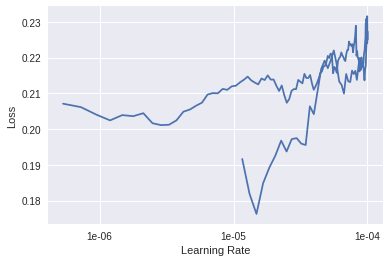

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.228920,0.219541,0.073072
2,0.207702,0.218163,0.072395
